In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
import plotly_express as px
import os

# Importing dataset from excel file

In [157]:
df_veckodata_riket = pd.read_excel("./Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

In [158]:
df_veckodata_riket

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


### Task A
A quick look through the data.

In [159]:
df_veckodata_riket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [160]:
df_veckodata_riket.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [161]:
df_veckodata_riket.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [162]:
df_veckodata_riket.index

RangeIndex(start=0, stop=142, step=1)

In [205]:
df_veckodata_riket.value_counts(sort=False)

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv  Vecka  
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.0                           0                  0.000000                    2020v6     1
      7            0                 0                           0                             1               0                   0                               0                          0                    0.0                           0                  0.000000                    2020v7     1
      8            0                 0                           0                             1      

In [164]:
df_veckodata_riket.value_counts().sum()

142

In [165]:
df_veckodata_riket.head(5)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


### Task B
Merge columns "år" and "veckonummer".

In [166]:
df_veckodata_riket["Vecka"] = df_veckodata_riket["år"].astype(str) + "v" + df_veckodata_riket["veckonummer"].astype(str)

In [167]:
df_veckodata_riket_merged = df_veckodata_riket.drop(["år", "veckonummer"], axis=1)

In [168]:
df_veckodata_riket_merged = df_veckodata_riket_merged[["Vecka"] + list(df_veckodata_riket_merged.columns[:-1])]

In [206]:
df_veckodata_riket_merged.head(5)

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.000000,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.000000,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.000000,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.000000,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.000000,0,0.000000
5,2020v11,838,8,10,1063,10,16,19,5,0.500000,5,0.500000
6,2020v12,924,9,17,1987,19,88,107,44,4.300000,49,4.700000
7,2020v13,1957,19,28,3944,38,238,345,190,18.400000,239,23.100000
8,2020v14,3229,31,50,7173,69,277,622,451,43.700001,690,66.800003
9,2020v15,3740,36,67,10913,106,289,911,664,64.300003,1354,131.100006


### Task C
Deceased cases per week

Seaborn

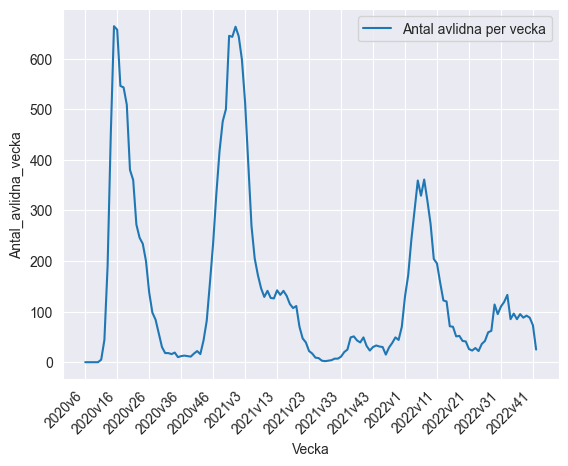

In [170]:
sns.set_style("darkgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=19))
plt.xticks(rotation=45, ha="right")

seaborn_deceased_weekly = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_avlidna_vecka", label = "Antal avlidna per vecka"
)
plt.show(seaborn_deceased_weekly)

Plotly express

In [171]:
plotly_deceased_weekly = px.line(
    df_veckodata_riket_merged, x="Vecka", y="Antal_avlidna_vecka", title="Antal avlidna per vecka"
)
plotly_deceased_weekly.show()

### Task D
New cases per week.

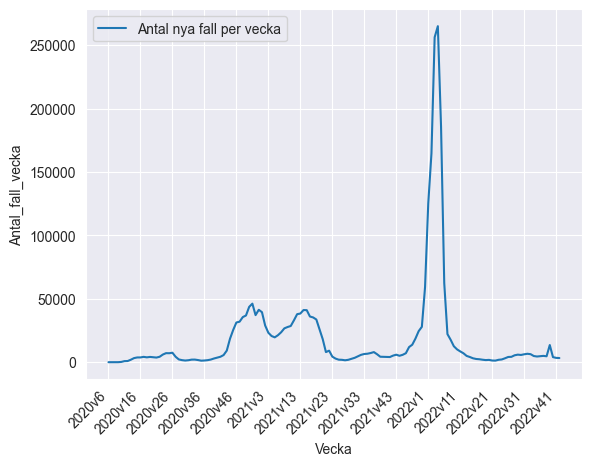

In [172]:
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=19))
plt.xticks(rotation=45, ha="right")

seaborn_new_cases_weekly = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_fall_vecka", label = "Antal nya fall per vecka"
)
plt.show(seaborn_new_cases_weekly)

In [173]:
plotly_new_cases_weekly = px.line(
    df_veckodata_riket_merged, x="Vecka", y="Antal_fall_vecka", title="Antal nya fall per vecka"
)
plotly_new_cases_weekly.show()

### Task E
Deceased cases per week and new cases per week in the same diagram.

Seaborn

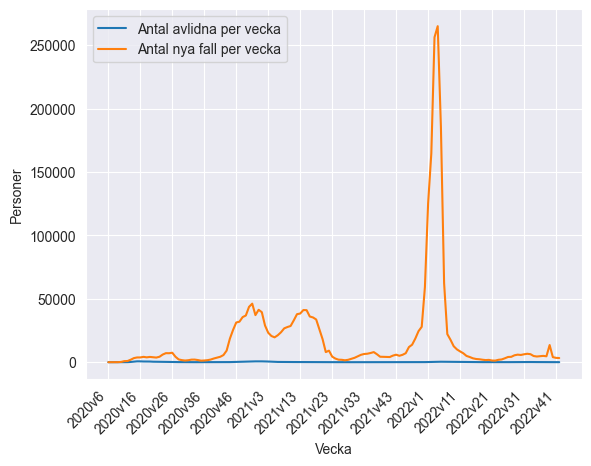

In [174]:
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=19))
plt.xticks(rotation=45, ha="right")

seaborn_deceased_weekly = sns.lineplot(
    data=df_veckodata_riket_merged, x="Vecka", y="Antal_avlidna_vecka", label="Antal avlidna per vecka"
)

seaborn_new_cases_weekly = sns.lineplot(
    data=df_veckodata_riket_merged, x="Vecka", y="Antal_fall_vecka", label="Antal nya fall per vecka"
)
plt.ylabel("Personer")
plt.show()

Plotly

In [175]:
plotly_combined_cases_weekly = px.line(
    df_veckodata_riket_merged, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"],
    title="Antal avlidna och nya fall per vecka",labels={"value": "Personer"}
)
plotly_combined_cases_weekly.show()

### Task F
Cumulative number of cases.


Seaborn

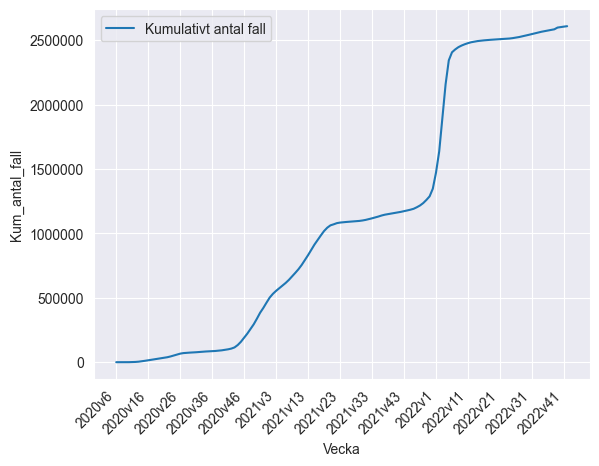

In [178]:
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=19))
plt.xticks(rotation=45, ha="right")

formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

seaborn_cumulative_number_of_cases = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Kum_antal_fall", label = "Kumulativt antal fall"
)
plt.show(seaborn_cumulative_number_of_cases)

Plotly

In [179]:
plotly_cumulative_number_of_cases = px.line(
    df_veckodata_riket_merged, x="Vecka", y="Kum_antal_fall", title="Kumulativt antal fall"
)
plotly_cumulative_number_of_cases.show()

### Seaborn subplot and saving files

Seaborn

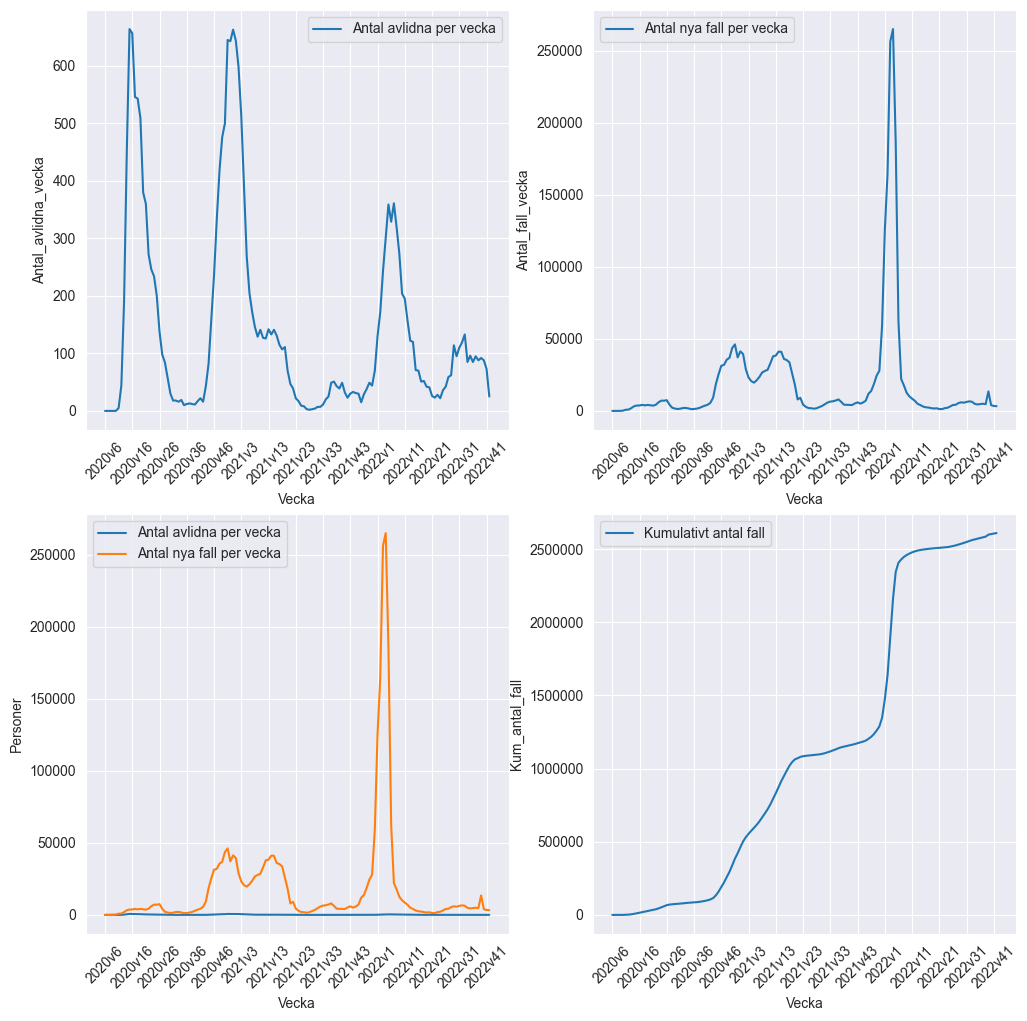

In [201]:
cases_subplot, axes = plt.subplots(2, 2, figsize=(12,12))

axes[0,0].xaxis.set_major_locator(MaxNLocator(nbins=19))
axes[0,0].tick_params(axis='x', rotation=45)
seaborn_deceased_weekly_subplot = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_avlidna_vecka", label = "Antal avlidna per vecka", ax=axes[0,0]
)

axes[0,1].xaxis.set_major_locator(MaxNLocator(nbins=19))
axes[0,1].tick_params(axis='x', rotation=45)
seaborn_new_cases_weekly_subplot = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_fall_vecka", label = "Antal nya fall per vecka", ax=axes[0,1]
)

axes[1,0].xaxis.set_major_locator(MaxNLocator(nbins=19))
axes[1,0].tick_params(axis='x', rotation=45)
seaborn_deceased_weekly_subplot = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_avlidna_vecka", label = "Antal avlidna per vecka", ax=axes[1,0]
)
seaborn_new_cases_weekly_subplot = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Antal_fall_vecka", label = "Antal nya fall per vecka", ax=axes[1,0]
)
axes[1, 0].set_ylabel("Personer")

axes[1,1].xaxis.set_major_locator(MaxNLocator(nbins=19))
axes[1,1].tick_params(axis='x', rotation=45)
axes[1, 1].yaxis.set_major_formatter(formatter)
seaborn_cumulative_number_of_cases_subplot = sns.lineplot(
    data = df_veckodata_riket_merged, x = "Vecka", y = "Kum_antal_fall", label = "Kumulativt antal fall", ax=axes[1,1]
)

plt.savefig(os.path.join("Visualisations", "Task_1_seaborn_subplot.png"))

Plotly

In [204]:
plotly_deceased_weekly.write_html("./Visualisations/Task_1_plotly_deceased_weekly.html")
plotly_new_cases_weekly.write_html("./Visualisations/Task_1_plotly_new_cases_weekly.html")
plotly_combined_cases_weekly.write_html("./Visualisations/Task_1_plotly_combined_cases_weekly.html")
plotly_cumulative_number_of_cases.write_html("./Visualisations/Task_1_plotly_cumulative_number_of_cases.html")